<a href="https://colab.research.google.com/github/rafaeljosem/MNA-ProyectoIntegrador_EQ10/blob/main/Avance-4/Avance4_Equipo10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

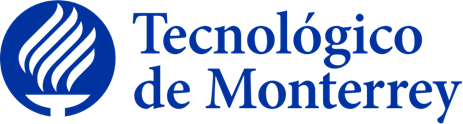

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Proyecto Integrador**

### Dra. Grettel Barceló Alonso
### Dr. Luis Eduardo Falcón Morales
### Mtra. Verónica Sandra Guzmán de Valle

### Domingo 2 de junio de 2024

## **Nombres y matrículas de los integrantes del Equipo 10:**

* Fernando Maytorena Espinosa de los Monteros | A01110946
* Jonathan Garza Bennet | A01793038
* Rafael José Mateo Comprés | A01793054

### 1. Libraries

First, we'll install and load the libraries that we will be using for this project.

In [1]:
#Let's install a couple of libraries that we'll use
#%%capture
!pip install -q -U google-generativeai
!pip install python-dotenv

In [10]:
import os
import google.generativeai as genai
# %load_ext cudf.pandas
import pandas as pd
from dotenv import load_dotenv, find_dotenv
from zipfile import ZipFile
import requests
import re
import json
from requests.exceptions import RequestException

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Load the dataset

Now we'll proceed to load the dataset to a Pandas dataframe with the cleaned compiled CSV with all the Mexican Federal Laws, we developed previously.

In [7]:
#CSV location in mounted drive
data_path = '/content/drive/MyDrive/MNA/Proyecto Integrador/Data/MexicanLaws_PrePro_DataSetMexicanLaws_Clean_Compiled_PrePro_DataSet.csv'

#Read CSV into a Pandas dataframe using first column as index
df_mexican_federal_laws = pd.read_csv(data_path, index_col=0)

#Display dataframe head to visualize that data was loaded correctly
df_mexican_federal_laws.head()

,Available Text Files,Available Clean Text Files,Number of Empty Text Files Found,Number of Empty Clean Text Files Found,Number of Copied Text Files,File Name,Text,Tokens
CÓDIGO CIVIL FEDERAL,1,0,0,0,1,CÓDIGO CIVIL FEDERAL_texto.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"['código', 'civil', 'federal', 'código', 'civi..."
CÓDIGO DE COMERCIO,1,0,0,0,1,CÓDIGO DE COMERCIO_texto.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"['código', 'comercio', 'código', 'comercio', '..."
CÓDIGO DE JUSTICIA MILITAR,1,0,0,0,1,CÓDIGO DE JUSTICIA MILITAR_texto.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"['código', 'justicia', 'militar', 'código', 'j..."
CÓDIGO FEDERAL DE PROCEDIMIENTOS CIVILES,3,1,0,0,1,6.pdf.txtlimpio.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"['código', 'federal', 'procedimientos', 'civil..."
CÓDIGO FISCAL DE LA FEDERACIÓN,3,1,0,0,1,8_241218.pdf.txtlimpio.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"['código', 'fiscal', 'federación', 'código', '..."


In [8]:
#Print the total documents loaded from CSV
print(f'Total number of documents in dataset: {len(df_mexican_federal_laws)}')

Total number of documents in dataset: 230


In [137]:
#Function that removes more that two subsequent line breaks
def clean_text(doc):
  #Empty list for tokens
  tokens = []

  #Remove all subsequent line breaks greater than 2
  clean_text = re.sub('\n{1,} | \n','\n', doc)
  clean_text = re.sub('\n{2,}','\n\n', clean_text)

  return clean_text

In [141]:
#Remove all subsequent line breaks greater than 2 in all df documents
df_mexican_federal_laws['Clean Text'] = [clean_text(x) for x in df_mexican_federal_laws['Text']]

#Visualize df head to see if results are correct
df_mexican_federal_laws.head()

,Available Text Files,Available Clean Text Files,Number of Empty Text Files Found,Number of Empty Clean Text Files Found,Number of Copied Text Files,File Name,Text,Tokens,Clean Text
CÓDIGO CIVIL FEDERAL,1,0,0,0,1,CÓDIGO CIVIL FEDERAL_texto.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"['código', 'civil', 'federal', 'código', 'civi...",\n\nCódigo Civil Federal\n\nCÓDIGO CIVIL FEDER...
CÓDIGO DE COMERCIO,1,0,0,0,1,CÓDIGO DE COMERCIO_texto.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"['código', 'comercio', 'código', 'comercio', '...",\n\nCódigo de Comercio\n\nCÓDIGO DE COMERCIO\n...
CÓDIGO DE JUSTICIA MILITAR,1,0,0,0,1,CÓDIGO DE JUSTICIA MILITAR_texto.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"['código', 'justicia', 'militar', 'código', 'j...",\n\nCódigo de Justicia Militar\n\nCÓDIGO DE JU...
CÓDIGO FEDERAL DE PROCEDIMIENTOS CIVILES,3,1,0,0,1,6.pdf.txtlimpio.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"['código', 'federal', 'procedimientos', 'civil...",\n\nCódigo Federal de Procedimientos Civiles\n...
CÓDIGO FISCAL DE LA FEDERACIÓN,3,1,0,0,1,8_241218.pdf.txtlimpio.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"['código', 'fiscal', 'federación', 'código', '...",\n\nCódigo Fiscal de la Federación\n\nCÓDIGO F...


### 3. Instruction set generation

We'll generate the instruction set that will be used to finetune the model. Since generating instruction datasets is a high-intensive work, we will use Gemini 1.5 to speed up the process. The main drawback of this method is that the generated instructions will not be of high quality, which will have some impact when finetuning our model.

For future work it would be beneficial to generate high-quality instructions using domain experts.

On some other note, we use Google Gemini because is the model that supports the longest context window (currently 1 millon tokens). Other models are way below this number, which means that providing the full text of the documents would have been problematic.

Finally, in our previous deliverable we stated that we would use Bonito, a LLM for generating instrution sets. Nonetheless, after carefully reading the documentation we found that Bonito only supports the english language. Since our corpus is in spanish, the use of Bonito is not viable.

**Please make sure to load the API Key in env format from the correct location, default location is the same directory of this notebook.**

In [51]:
#We need a API key .env path
dot_env_path = '/content/drive/MyDrive/MNA/Proyecto Integrador/.env'

#Load .env file
load_dotenv(dot_env_path)

#Get API Key
GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')


In [53]:
#Configure the API Key
genai.configure(api_key=GEMINI_API_KEY)

In [54]:
# Create the model
# See https://ai.google.dev/api/python/google/generativeai/GenerativeModel

#Model Hyperparameters
generation_config = {
  "temperature": 1.5,
  "top_p": 0.95,
  "top_k": 64,
  "max_output_tokens": 8192,
  "response_mime_type": "text/plain",
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE",
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE",
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE",
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE",
  },
]

Below we define our prompt for Google Gemini

In [55]:
#Base prompt to be used for giving context and tasks to perform to Google Gemini
prompt = """
Eres un experto en inteligencia artificial, trabajas en el desarrollo de Large Language Models.
Estás encargado del desarrollo de un modelo de lenguaje experto en el dominio de las leyes mexicanas, para lo cual estás creando un dataset de tipo instruction tuning.
Hasta el momento, has recabado más de 300 leyes mexicanas, de las cuales requieres extraer información relevante y generar el dataset con preguntas y
respuestas basados en los documentos legislativos.

Tomando en cuenta el contenido de la ley que compartiré debajo, por favor genera 10 ejemplos de plantillas de tipo "Question Answering (QA)", "Summarization", "Legal Advice Generation" y "Legal Document Drafting", siguiendo el formato de pares instruction-output.
Ejemplo de Question Answering (QA):
[
{
"instruction": "Según el artículo 22 del Código Civil Federal, ¿desde qué momento entra el individuo concebido bajo la protección de la ley?",
"output": "De acuerdo al artículo 22 del Código Civil Federal, desde el momento en que un individuo es concebido, entra bajo la protección de la ley y se le tiene por
nacido para los efectos declarados en el presente Código."
},
{
"instruction": "¿Qué establece el artículo 23 del Código Civil Federal sobre el ejercicio de derechos de los incapaces?",
"output": "Según el artículo 23 del Código Civil Federal, la minoría de edad, el estado de interdicción y demás incapacidades establecidas por la ley, son
restricciones a la personalidad jurídica que no deben menoscabar la dignidad de la persona ni atentar contra la integridad de la familia; pero los incapaces pueden ejercitar sus derechos o contraer obligaciones por medio de sus representantes."
}
]
Ejemplos de Summarization:
[
{
"instruction": "Resume las obligaciones del Juez del Registro Civil respecto a las actas, según los artículos 43 a 49 del Código Civil Federal.",
"output": "De acuerdo a los artículos 43 a 49 del Código Civil Federal, el Juez del Registro Civil tiene las siguientes obligaciones respecto a las actas: asentar sólo lo
declarado para el acto y previsto en la ley; permitir la representación por mandatario especial; preferir testigos designados por los interesados; evitar falsificación o
inserción de circunstancias prohibidas; corregir vicios o defectos no sustanciales; dar testimonio de actas; y autorizar actas de su propia familia en la adscripción
más próxima."
},
{
"instruction": "Sintetiza lo que establece el Código Civil Federal en los artículos del 86 al 88 sobre la adopción plena.",
"output": "Los artículos 86, 87 y 88 del Código Civil Federal establecen que en la adopción plena se levantará un acta como si fuera de nacimiento, se harán
anotaciones en el acta de nacimiento originaria, la cual quedará reservada. No se publicará ni expedirá constancia alguna que revele el origen del adoptado ni su
condición, salvo providencia judicial. El artículo 88 fue derogado."
}
]
Ejemplos de Legal Advice Generation:
[
{
"instruction": "Si dos personas quieren contraer matrimonio siendo menores de edad, ¿qué requisitos deben cumplir según el Código Civil Federal?",
"output": "De acuerdo al Código Civil Federal, si dos personas menores de edad quieren contraer matrimonio, deben cumplir los siguientes requisitos: 1) Tener al
menos 16 años el hombre y 14 la mujer (art. 148); 2) Obtener el consentimiento de sus padres, abuelos paternos o tutores (arts. 149-155); 3) Solicitar la dispensa del
juez de lo familiar (art. 151); 4) Presentar su solicitud ante el Juez del Registro Civil (art. 97) con la documentación requerida (art. 98). Se recomienda consultar a un
abogado especializado para recibir orientación específica a su caso."
},
{
"instruction": "¿Qué pasos debe seguir una persona para solicitar una acta de nacimiento según el Código Civil Federal?",
"output": "Para solicitar un acta de nacimiento, el Código Civil Federal establece en sus artículos 54 a 76 el siguiente procedimiento: 1) Presentar al recién nacido
ante el Juez del Registro Civil en su oficina o lugar de nacimiento; 2) Los padres o abuelos declaran el nacimiento dentro de los 6 meses siguientes; 3) Si nace en
casa, el jefe de familia tiene obligación de dar aviso; 4) Si nace en un sanatorio,el director o administrador dará aviso; 5) Se levantará el acta de nacimiento con
asistencia de dos testigos, expresándose todos los datos requeridos por la ley. Es importante cumplir los plazos y proporcionar información veraz para evitar
contratiempos posteriores."
}
]
Ejemplos de Legal Document Drafting:
[
{
"instruction": "Redacta una cláusula para un contrato de compraventa de un inmueble, estipulando que las partes se someten a las leyes mexicanas según el
Código Civil Federal.",
"output": "CLÁUSULA DÉCIMA.- LEY APLICABLE. Para todo lo relativo a la interpretación, cumplimiento y ejecución del presente contrato, las partes acuerdan
someterse a las leyes federales de los Estados Unidos Mexicanos, en particular a las disposiciones del Código Civil Federal, según lo establecido en sus artículos 12,
13 y demás relativos y aplicables, renunciando expresamente a cualquier otra ley, fuero o jurisdicción que pudiera corresponderles en virtud de sus domicilios
presentes o futuros."
},
{
"instruction": "Elabora una cláusula para un contrato de arrendamiento especificando que la renta se incrementará anualmente conforme al Código Civil Federal.",
"output": "CLÁUSULA DÉCIMA.- INCREMENTO DE LA RENTA. Las partes acuerdan que la renta pactada en la cláusula X del presente contrato se incrementará anualmente
de manera automática, aplicando el porcentaje de aumento que corresponda al Índice Nacional de Precios al Consumidor (INPC) publicado por el Banco de México.
Lo anterior con fundamento en lo dispuesto por el artículo 2448-J del Código Civil Federal. El arrendador notificará por escrito al arrendatario, con al menos 30
días de anticipación, el monto de la renta actualizada que entrará en vigor en la fecha de aniversario del contrato."
}
]
Por cada registro del JSON que se encuentra a continuación, genera un par instruction-output de cada tipo ("Question Answering (QA)", "Summarization", "Legal Advice Generation" y "Legal Document Drafting"):
"""

In [56]:
#Define model and its configuration
model = genai.GenerativeModel(
  model_name="gemini-1.5-flash-latest",
  safety_settings=safety_settings,
  generation_config=generation_config,
  system_instruction= prompt,
)

We now loop through every document and send the prompt and the document text to Google Gemini. Sometimes, Google Gemini might throw a recitation error. The reason of why this occurs is not entirely known, but it seems that some content is being flagged for unauthorized citations.

Please, be aware that the following step might take around 10-15 minutes to execute.

In [145]:
#Empty dictionary for storing
outputs = {}
errors = []

for index, row in df_mexican_federal_laws.iloc[0:8].iterrows():

    try:
        #chat_session = model.start_chat(history=history)
        chat_session = model.start_chat()
        msg = "Extrae el JSON para la siguiente ley:\n---\n" + \
            row['Clean Text'] + "---"
        json_output = chat_session.send_message(msg)
        #Let's format the output to get a valid json
        result = re.sub(r"(json\n|`{3})", "",
                        json_output.text, 0, re.MULTILINE)
        outputs[index] = json.loads(result)

        print(index+' processed correctly'+'\n\n')

    #Sometimes Google Gemini might throw a recitation error
    except Exception as e:

        print(index+' not processed correctly the following error was present:\n\n'+str(e)+'\n\n')

        errors.append(
            {'title': index,
             'error': e,
             'error_msg': str(e)})
        continue

CÓDIGO CIVIL FEDERAL not processed correctly the following error was present:

The `response.text` quick accessor only works when the response contains a valid `Part`, but none was returned. Check the `candidate.safety_ratings` to see if the response was blocked.


CÓDIGO DE COMERCIO processed correctly


CÓDIGO DE JUSTICIA MILITAR not processed correctly the following error was present:

finish_reason: RECITATION
index: 0



CÓDIGO FEDERAL DE PROCEDIMIENTOS CIVILES processed correctly


CÓDIGO FISCAL DE LA FEDERACIÓN processed correctly


CÓDIGO MILITAR DE PROCEDIMIENTOS PENALES processed correctly


CÓDIGO NACIONAL DE PROCEDIMIENTOS PENALES not processed correctly the following error was present:

block_reason: OTHER



CÓDIGO PENAL FEDERAL not processed correctly the following error was present:

block_reason: OTHER





In [146]:
print(f'Number of files processed correctly: {len(outputs)}\n'\
    f'Number of files with errors: {len(errors)}')

Number of files processed correctly: 4
Number of files with errors: 4


In [60]:
print(errors)

[{'title': 'CÓDIGO CIVIL FEDERAL', 'error': StopCandidateException(finish_reason: RECITATION
index: 0
), 'error_msg': 'finish_reason: RECITATION\nindex: 0\n'}, {'title': 'CÓDIGO DE COMERCIO', 'error': StopCandidateException(finish_reason: RECITATION
index: 0
), 'error_msg': 'finish_reason: RECITATION\nindex: 0\n'}, {'title': 'CÓDIGO FEDERAL DE PROCEDIMIENTOS CIVILES', 'error': StopCandidateException(finish_reason: RECITATION
index: 0
), 'error_msg': 'finish_reason: RECITATION\nindex: 0\n'}, {'title': 'CÓDIGO NACIONAL DE PROCEDIMIENTOS PENALES', 'error': BlockedPromptException(block_reason: OTHER
), 'error_msg': 'block_reason: OTHER\n'}, {'title': 'CÓDIGO PENAL FEDERAL', 'error': BlockedPromptException(block_reason: OTHER
), 'error_msg': 'block_reason: OTHER\n'}, {'title': 'CONSTITUCIÓN POLÍTICA DE LOS ESTADOS UNIDOS MEXICANOS', 'error': StopCandidateException(finish_reason: RECITATION
index: 0
), 'error_msg': 'finish_reason: RECITATION\nindex: 0\n'}]


In [59]:
print (outputs)

{'CÓDIGO DE JUSTICIA MILITAR': [{'instruction': 'Según el Código de Justicia Militar, ¿quiénes son los encargados de la administración de la justicia militar?', 'output': 'La administración de justicia militar corresponde al Supremo Tribunal Militar, los Tribunales Militares de Juicio Oral, los Jueces Militares de Control, los Jueces de Ejecución de Sentencia y los auxiliares que las leyes le atribuyan ese carácter.'}, {'instruction': 'Resume los requisitos para ser magistrado del Tribunal Superior Militar.', 'output': 'Para ser magistrado del Tribunal Superior Militar se requiere ser mexicano por nacimiento, mayor de treinta años, abogado con título oficial, acreditar al menos diez años de práctica profesional en el servicio de Justicia Militar o Naval y ser de notoria honorabilidad.'}, {'instruction': 'Un militar comete un delito en contra de un civil en un buque de guerra, ¿a quién corresponde la jurisdicción?', 'output': 'La jurisdicción militar solo es competente para delitos con

Finally, we write the output to a file

In [ ]:
with open('instruction_set.json', mode='wt') as f:
    f.write(json.dumps(outputs))

### 5. Conclusions

In this notebook we generated a few instruction sets to be used when finetuning our model. Since generating instruction sets requires resources that we currently don't have, such as domain experts, quality verification, etc. we had to use Google Gemini.

Since these instruction sets are not considered of high quality, it's expected to have some impact in our final model. Nonetheless, for the purpose of this activity this sets will be sufficient. Our next step would be to generate more instruction sets, since the ones generated in this notebook only considered a few laws in order to minimize the execution time of this notebook.

The purpose of this excercise was to demonstrate the approach the project is going to use for generating an instruction fine tuning dataset with the context contained in the Mexican Federal Laws dataset. Only a small sample of 11 documents was used for this first trial, succesfully producing the desired instruction/output pairs.

We experienced some errors during the execution of this notebook that are related to assuming latin_1 encoding for all documents. On the previous delivery on which we compiled all the clean documents into a single CVS file, correct formatting was chosen for each individual document and we do not expect to experience errors while implemeting this methodology for generating our full instruction fine tuning dataset.

# **References:**

Martinez-Seis, B., Pichardo-Lagunas, O., Koff, H., Equihua, M., Perez-Maqueo, O., & Hernández-Huerta, A. (2022, July 6). Unified, labeled, and semi-structured database of pre-processed Mexican laws. MDPI. https://www.mdpi.com/2306-5729/7/7/91

Liu, Y. (2024, March 22). How to generate instruction datasets from any documents for LLM Fine-Tuning. Medium. https://towardsdatascience.com/how-to-generate-instruction-datasets-from-any-documents-for-llm-fine-tuning-abb319a05d91

Google. (n.d.). Gemini API docs and reference  |  google AI for developers  |  google for developers. Google. https://ai.google.dev/gemini-api/docs
